# Interpolation
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), February 2019
The code in this Jupyter notebook was written using Python 3.6. It also uses data file ? and the image file ?. This data file and image file are stored along with the Jupyter notebook file `Interp.ipynb` in the public GitHub repository [https://github.com/rickecon/Notebooks/tree/master/GMM](https://github.com/rickecon/Notebooks/tree/master/Interp).

For teaching and learning purposes, it is best to clear all cell output by selecting `Cell` then `All Output` then `Clear` from the menu across the top of this notebook. However, this notebook comes with all the cells' output displayed.

## 1. Introduction
Interpolation is a nonparametric method of inferring unknown data from known data.  

## 2. Examples

### 2.1. Fertility rates
The U.S. National Vital Statistics Reports, Volume 64, Number 1,    January 15, 2015, Table 3, final 2013 data [http://www.cdc.gov/nchs/data/nvsr/nvsr64/nvsr64_01.pdf](http://www.cdc.gov/nchs/data/nvsr/nvsr64/nvsr64_01.pdf) shows number of births per 1,000 females by age group

<IPython.core.display.Javascript object>


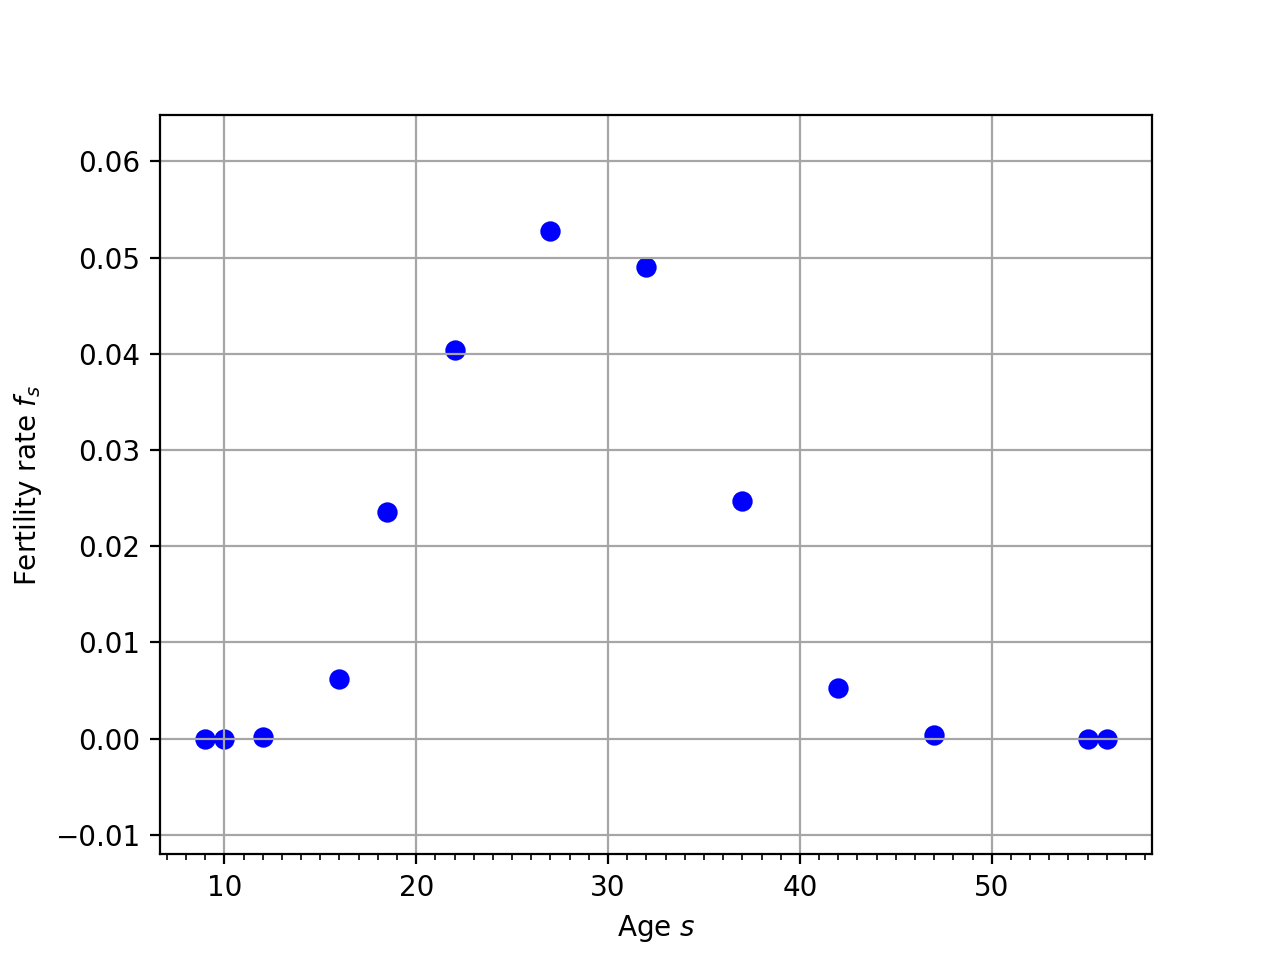

Text(0,0.5,'Fertility rate $f_{s}$')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
# %matplotlib notebook

# Hard code input births data by age group
# Add two zeros on the end of each vector
# Age bins are 9, 10, 10-14, 15-17, 18-19, 20-24, 25-29, 30-34, 35-39,
# 40-44, 45-49, 55, 56. First two and last two are not data

fert_data = (np.array([0.0, 0.0, 0.3, 12.3, 47.1, 80.7, 105.5, 98.0,
                       49.3, 10.4, 0.8, 0.0, 0.0]) / 2000)
age_midp = np.array([9, 10, 12, 16, 18.5, 22, 27, 32, 37, 42, 47,
                     55, 56])

fig, ax = plt.subplots()
plt.scatter(age_midp, fert_data, s=40, c='blue', marker='o',
            label='Data')
# for the minor ticks, use no labels; default NullFormatter
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.xlabel(r'Age $s$')
plt.ylabel(r'Fertility rate $f_{s}$')

<IPython.core.display.Javascript object>


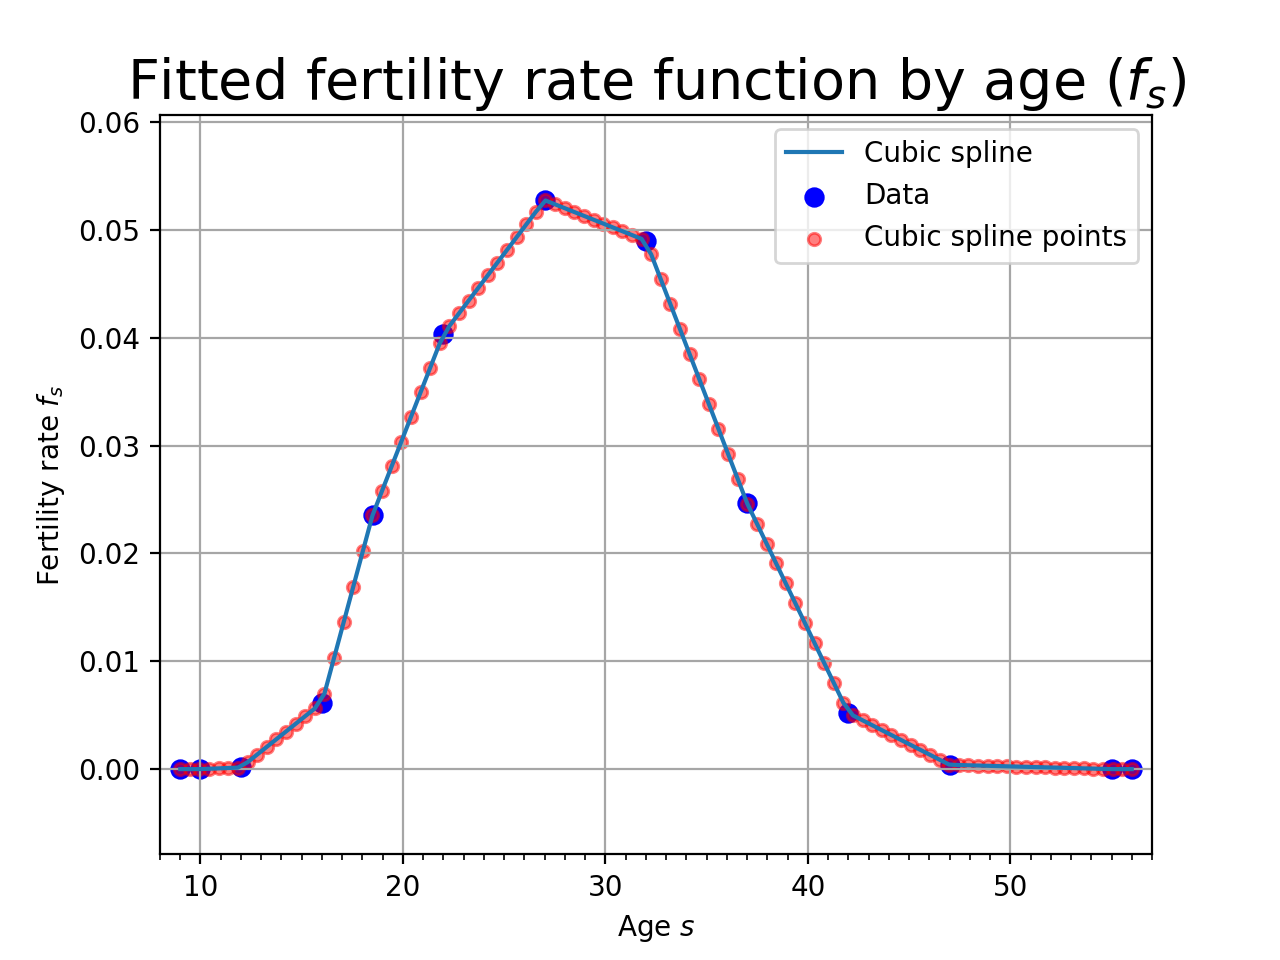

In [4]:
import scipy.interpolate as si

fert_func = si.interp1d(age_midp, fert_data, kind='linear')
age_fine = np.linspace(age_midp.min(), age_midp.max(), 100)
fert_fine = fert_func(age_fine)

fig, ax = plt.subplots()
plt.scatter(age_midp, fert_data, s=40, c='blue', marker='o',
            label='Data')
plt.scatter(age_fine, fert_fine, s=20, c='red', marker='o',
            alpha=0.5, label='Cubic spline points')
plt.plot(age_fine, fert_fine, label='Cubic spline')
# for the minor ticks, use no labels; default NullFormatter
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Fitted fertility rate function by age ($f_{s}$)',
          fontsize=20)
plt.xlabel(r'Age $s$')
plt.ylabel(r'Fertility rate $f_{s}$')
plt.xlim((age_midp.min() - 1, age_midp.max() + 1))
plt.ylim((-0.15 * (fert_fine.max()),
          1.15 * (fert_fine.max())))
plt.legend(loc='upper right')

### 2.2. Interpolation through lots of points (regression)
This is what I have you doing in your problem set.
Good functions are ...